This file performs statistical tests using the Wilcoxon rank-sum test to determine whether differences in metric values (objectives) between filtered and unfiltered datasets are statistically significant. It also includes functions to calculate averages, plot relationships between features and metrics, and provide detailed output on the performance of each metric.

In [ ]:
pip install matplotlib pandas scipy

In [1]:
"""
Statistical test on each metric separately
alpha = 0.05 (5%)
if p < 0.05, reject H0, else accept H0
"""
import numpy as np
import pandas as pd
from scipy.stats import ranksums
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05

def perform_wilcoxon_test(group1, group2, metric_name, is_hamming_loss=False):
    stat, p = ranksums(group1, group2)
    median_group1 = np.median(group1)
    median_group2 = np.median(group2)

    print(f"Test for {metric_name}")
    print(f"Statistic: {stat}, p-value: {p}")
    if p < alpha:
        print("Reject the null hypothesis: There is a significant difference between filtered and unfiltered data.")
        if is_hamming_loss:
            if median_group1 < median_group2:
                print(f"Unfiltered data performs better for {metric_name}.")
            else:
                print(f"Filtered data performs better for {metric_name}.")
        else:
            if median_group1 < median_group2:
                print(f"Filtered data performs better for {metric_name}.")
            else:
                print(f"Unfiltered data performs better for {metric_name}.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between filtered and unfiltered data.")
        if is_hamming_loss:
            if median_group1 < median_group2:
                print(f"Unfiltered data tends to perform better for {metric_name}, but not significantly.")
            else:
                print(f"Filtered data tends to perform better for {metric_name}, but not significantly.")
        else:
            if median_group1 < median_group2:
                print(f"Filtered data tends to perform better for {metric_name}, but not significantly.")
            else:
                print(f"Unfiltered data tends to perform better for {metric_name}, but not significantly.")
    print("\n")

# Plotting function
def plot_features_vs_hl(num_features, min_hl, title, color, label):
    plt.scatter(num_features, min_hl, color=color, label=label)

    if len(np.unique(num_features)) >= 2:
        try:
            plt.plot(np.unique(num_features), np.poly1d(np.polyfit(num_features, min_hl, 1))(np.unique(num_features)), color=color)
        except np.linalg.LinAlgError:
            print(f"Warning: LinAlgError encountered while fitting polynomial for {label}. Plotting scatter only.")
    else:
        print(f"Warning: Not enough unique feature numbers to fit a polynomial for {label}. Plotting scatter only.")

    plt.xlabel('Number of Features')
    plt.ylabel('Minimum Hamming Loss')
    plt.title(title)
    plt.grid(True)

def print_with_average(run, arrays):
    print("Run #:", run, "\n")
    for name, array in arrays.items():
        average = sum(array) / len(array) if len(array) > 0 else 0
        print(f"{name}: {array} \nAverage {name}: {average}\n")

def read_and_test(df, name):
  # Strip any leading or trailing spaces from column names
  df.columns = df.columns.str.strip()

  # Extract the columns into arrays
  run = df['Run #'].values
  hamloss_val_all = df['HamLoss_Val_All'].values
  hamloss_test_all = df['HamLoss_Test_All'].values
  hamloss_val_filtered = df['HamLoss_Val_Filtered'].values
  hamloss_test_filtered = df['HamLoss_Test_Filtered'].values
  minhamloss_val_unf = df['MinHamLoss_Val_Unf'].values
  numfeatures_minhamloss_val_unf = df['NumFeatures_MinHamLoss_Val_Unf'].values
  minhamloss_test_unf = df['MinHamLoss_Test_Unf'].values
  numfeatures_minhamloss_test_unf = df['NumFeatures_MinHamLoss_Test_Unf'].values
  minhamloss_val_filt = df['MinHamLoss_Val_Filt'].values
  numfeatures_minhamloss_val_filt = df['NumFeatures_MinHamLoss_Val_Filt'].values
  minhamloss_test_filt = df['MinHamLoss_Test_Filt'].values
  numfeatures_minhamloss_test_filt = df['NumFeatures_MinHamLoss_Test_Filt'].values
  hv_val_unf = df['HV_Val_Unf'].values
  hv_test_unf = df['HV_Test_Unf'].values
  hv_val_filt = df['HV_Val_Filt'].values
  hv_test_filt = df['HV_Test_Filt'].values

  print(f'Dataset: {name}')

  # Print the average values of each column
  arrays = {
    "HamLoss_Val_All": hamloss_val_all,
    "HamLoss_Val_Filtered": hamloss_val_filtered,
    "MinHamLoss_Val_Unf": minhamloss_val_unf,
    "NumFeatures_MinHamLoss_Val_Unf": numfeatures_minhamloss_val_unf,
    "MinHamLoss_Val_Filt": minhamloss_val_filt,
    "NumFeatures_MinHamLoss_Val_Filt": numfeatures_minhamloss_val_filt,
    "HV_Val_Unf": hv_val_unf,
    "HV_Val_Filt": hv_val_filt,
    "HamLoss_Test_All": hamloss_test_all,
    "HamLoss_Test_Filtered": hamloss_test_filtered,
    "MinHamLoss_Test_Unf": minhamloss_test_unf,
    "NumFeatures_MinHamLoss_Test_Unf": numfeatures_minhamloss_test_unf,
    "MinHamLoss_Test_Filt": minhamloss_test_filt,
    "NumFeatures_MinHamLoss_Test_Filt": numfeatures_minhamloss_test_filt,
    "HV_Test_Unf": hv_test_unf,
    "HV_Test_Filt": hv_test_filt
  }
  print_with_average(run, arrays)

  # Minimum Hamming Loss Tests
  # Number of Features Tests
  # Average of Minimum Hamming Loss Values
  # Hypervolume Tests
  # Average Hypervolume

  perform_wilcoxon_test(minhamloss_val_unf, minhamloss_val_filt, "Minimum Hamming Loss Values on Validation Set", True)
  perform_wilcoxon_test(numfeatures_minhamloss_val_unf, numfeatures_minhamloss_val_filt, "Number of Features for Min Ham Loss on Validation Set", True)
  avg_min_HL_val_unf = np.mean(minhamloss_val_unf)
  avg_min_HL_val_filt = np.mean(minhamloss_val_filt)
  perform_wilcoxon_test(minhamloss_val_unf, minhamloss_val_filt, "Average Minimum Hamming Loss on Validation Set", True)
  perform_wilcoxon_test(hv_val_unf, hv_val_filt, "Hypervolume Values on Validation Set")
  avg_HV_val_unf = np.mean(hv_val_unf)
  avg_HV_val_filt = np.mean(hv_val_filt)
  perform_wilcoxon_test(hv_val_unf, hv_val_filt, "Average Hypervolume on Validation Set")

  print("#"*30)

  perform_wilcoxon_test(numfeatures_minhamloss_test_unf, numfeatures_minhamloss_test_filt, "Number of Features for Min Ham Loss on Test Set", True)
  perform_wilcoxon_test(minhamloss_test_unf, minhamloss_test_filt, "Minimum Hamming Loss Values on Test Set", True)
  avg_min_HL_test_unf = np.mean(minhamloss_test_unf)
  avg_min_HL_test_filt = np.mean(minhamloss_test_filt)
  perform_wilcoxon_test(minhamloss_test_unf, minhamloss_test_filt, "Average Minimum Hamming Loss on Test Set", True)
  perform_wilcoxon_test(hv_test_unf, hv_test_filt, "Hypervolume Values on Test Set")
  avg_HV_test_unf = np.mean(hv_test_unf)
  avg_HV_test_filt = np.mean(hv_test_filt)
  perform_wilcoxon_test(hv_test_unf, hv_test_filt, "Average Hypervolume on Test Set")


  # Plot for Validation Set
  plt.figure(figsize=(12, 6))
  plt.suptitle(f'{name}')  # Add a super title for the entire figure

  plt.subplot(1, 2, 1)
  plot_features_vs_hl(numfeatures_minhamloss_val_unf, minhamloss_val_unf, 'Validation Set', 'blue', 'Unfiltered')
  plot_features_vs_hl(numfeatures_minhamloss_val_filt, minhamloss_val_filt, 'Validation Set', 'red', 'Filtered')
  plt.legend()

  # Plot for Test Set
  plt.subplot(1, 2, 2)
  plot_features_vs_hl(numfeatures_minhamloss_test_unf, minhamloss_test_unf, 'Test Set', 'blue', 'Unfiltered')
  plot_features_vs_hl(numfeatures_minhamloss_test_filt, minhamloss_test_filt, 'Test Set', 'red', 'Filtered')
  plt.legend()

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

Dataset: Corel5k
Run #: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'] 

HamLoss_Val_All: [0.01223071 0.01223071 0.01223071 0.01223071 0.01223071 0.01223071
 0.01223071 0.01223071 0.01223071 0.01223071 0.01223071 0.01223071
 0.01223071 0.01223071 0.01223071] 
Average HamLoss_Val_All: 0.012230710469999998

HamLoss_Val_Filtered: [0.01095875 0.01095875 0.01095875 0.01095875 0.01095875 0.01095875
 0.01095875 0.01095875 0.01095875 0.01095875 0.01095875 0.01095875
 0.01095875 0.01095875 0.01095875] 
Average HamLoss_Val_Filtered: 0.01095874714

MinHamLoss_Val_Unf: [0.00929582 0.00932568 0.00933678 0.00933678 0.00933985 0.00927426
 0.00934301 0.00927839 0.00930511 0.0093175  0.00931627 0.00934045
 0.00927839 0.00932719 0.00933985] 
Average MinHamLoss_Val_Unf: 0.009317021741799998

NumFeatures_MinHamLoss_Val_Unf: [6. 8. 5. 5. 9. 8. 5. 4. 7. 8. 7. 5. 6. 7. 6.] 
Average NumFeatures_MinHamLoss_Val_Unf: 6.4

MinHamLoss_Val_Filt: [0.00931988 0.00930123 0.00932099 0.00930877 0.00

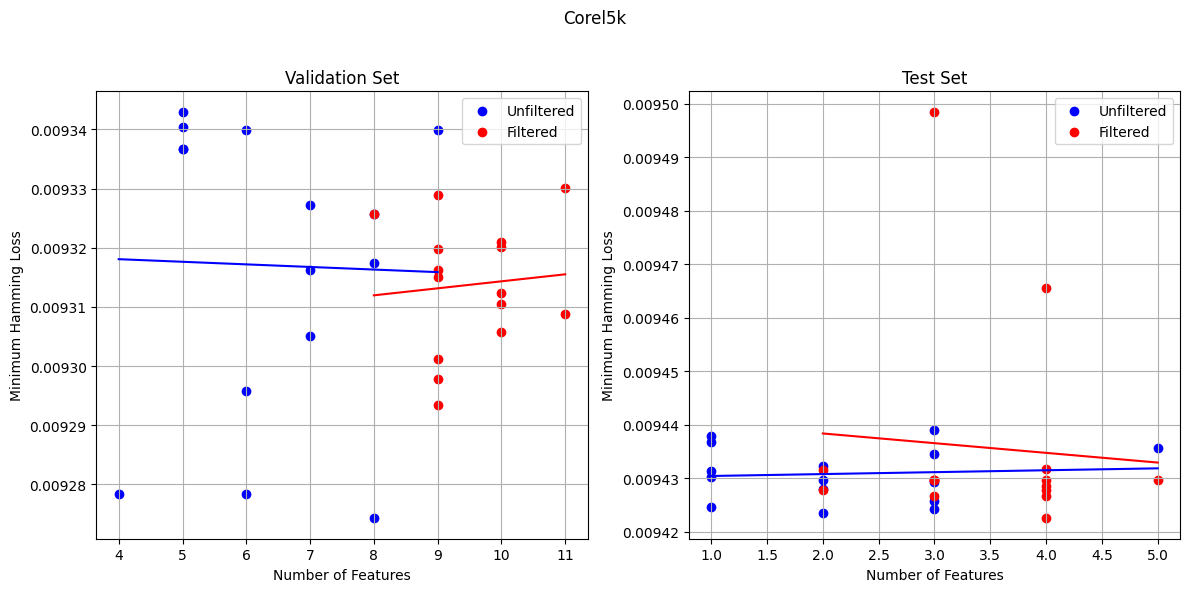



##############################




In [ ]:
# Example use of the read_and_test function. Ensure that the name of the dataset is at the same index as the csv file for the corresponding dataset.
dfs = ['Data collection - Enron.csv','Data collection - Birds.csv','Data collection - Coffee.csv','Data collection - Emotions.csv','Data collection - Enron.csv','Data collection - Scene.csv']
datasets = ['Enron', 'Birds', 'Coffee', 'Emotions', 'Enron', 'Scene']

for df, dats in zip(dfs, datasets):
  read_and_test((pd.read_csv(df)).iloc[:-1], dats)
  print("\n")
  print("#"*30)
  print("\n")

In [ ]:
  # Print the arrays with a blank line between each
  # print("Run #:", run, "\n")
  # print("HamLoss_Val_All:", hamloss_val_all, "\n")
  # print("HamLoss_Test_All:", hamloss_test_all, "\n")
  # print("HamLoss_Val_Filtered:", hamloss_val_filtered, "\n")
  # print("HamLoss_Test_Filtered:", hamloss_test_filtered, "\n")
  # print("MinHamLoss_Val_Unf:", minhamloss_val_unf, "\n")
  # print("NumFeatures_MinHamLoss_Val_Unf:", numfeatures_minhamloss_val_unf, "\n")
  # print("MinHamLoss_Test_Unf:", minhamloss_test_unf, "\n")
  # print("NumFeatures_MinHamLoss_Test_Unf:", numfeatures_minhamloss_test_unf, "\n")
  # print("MinHamLoss_Val_Filt:", minhamloss_val_filt, "\n")
  # print("NumFeatures_MinHamLoss_Val_Filt:", numfeatures_minhamloss_val_filt, "\n")
  # print("MinHamLoss_Test_Filt:", minhamloss_test_filt, "\n")
  # print("NumFeatures_MinHamLoss_Test_Filt:", numfeatures_minhamloss_test_filt, "\n")
  # print("HV_Val_Unf:", hv_val_unf, "\n")
  # print("HV_Test_Unf:", hv_test_unf, "\n")
  # print("HV_Val_Filt:", hv_val_filt, "\n")
  # print("HV_Test_Filt:", hv_test_filt, "\n")